In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge
import shap
import lime
from lime import lime_tabular

# Load dataset
data_path = 'flood.csv'  # Update this if the file is in a different location
df = pd.read_csv(data_path)
# Assume `df` is a DataFrame where 'target' is the flood probability column
X = df.drop(columns=['FloodProbability'])  # Features
y = df['FloodProbability']  # Target variable (flood probability)

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Bayesian Ridge Regression model
model = BayesianRidge()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)










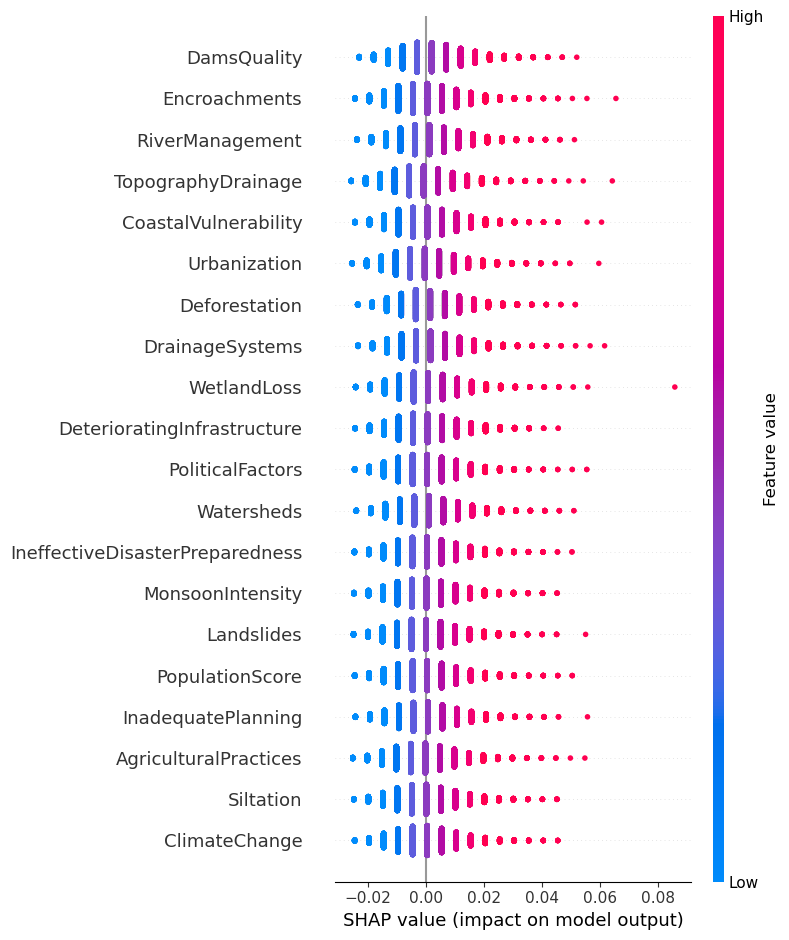

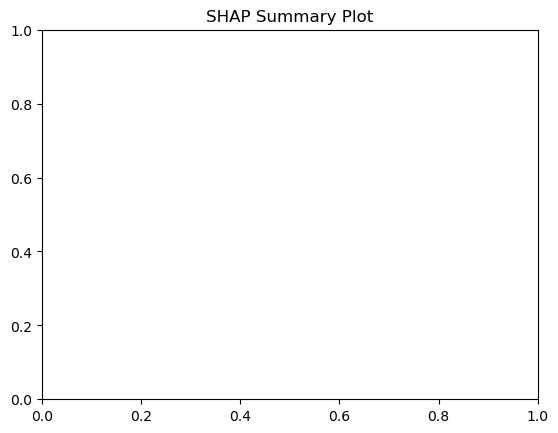

In [2]:
# SHAP Analysis
explainer = shap.Explainer(model, X_train_scaled)
shap_values = explainer(X_test_scaled)


# Generate SHAP Summary Plot
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)
plt.title('SHAP Summary Plot')
plt.show()

In [3]:
# Check the column names in the dataframe
print(df.columns)


Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')


The figure illustrates a SHAP (SHapley Additive exPlanations) summary plot, depicting the impact of different features on the output of a machine learning model. Each dot represents the SHAP value of an individual prediction for a particular feature, with the color gradient indicating the feature value (blue for low values and red for high values). Features are listed on the y-axis, ranked by their average contribution to the model’s predictions. Notably, features such as "Climate Change," "Siltation," and "Agricultural Practices" show higher SHAP values, indicating their strong influence on model output. On the other hand, features like "Dams Quality" and "Encroachments" have a smaller effect, with SHAP values clustered near zero. This plot provides insights into how feature values, both high and low, influence the models decision-making process, enabling better interpretability of complex models in applications like environmental impact assessments or disaster preparedness systems.

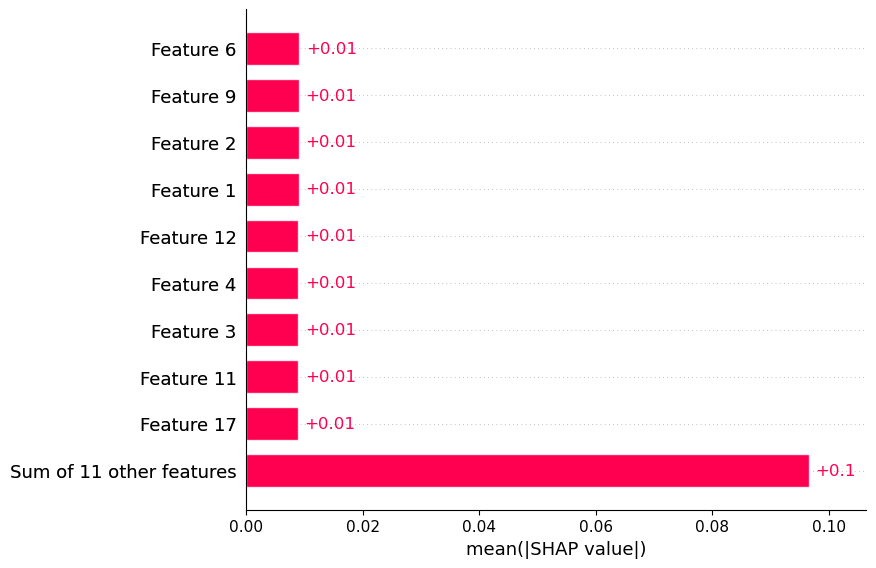

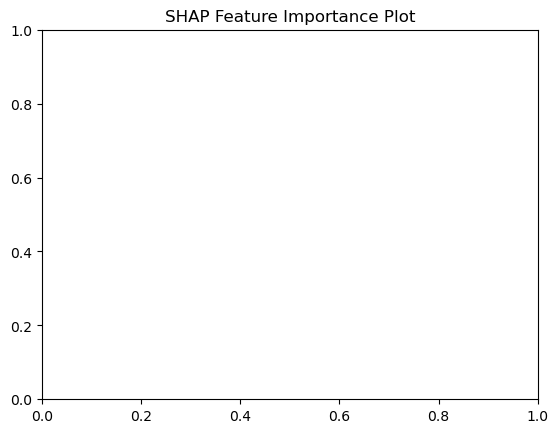

In [4]:
# 2. SHAP Feature Importance Bar Plot

plt.figure(figsize=(12, 8))

shap.plots.bar(shap_values, max_display=10)  # Show top 10 important features
plt.title('SHAP Feature Importance Plot')
plt.show()

This image is a type of SHAP feature importance bar plot, ranking features according to how much they contribute to the predictions of an ML model. The horizontal axis is on average of the mean absolute SHAP value showing how much each feature impacts the model on average. The "Sum of 11 other features" is the most influential with a mean SHAP value of approximately 0.1, whereas other features, like Feature 6, Feature 9, and Feature 2, have much smaller and near equal contributions of around 0.01. The plot allows for the interpretation of model predictions with regard to visually highlighting the most relevant features in the data set.

In [6]:
# 4. SHAP Force Plot (for first instance)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test.iloc[0], feature_names=X.columns)



The plot presented below is a SHAP force plot, where the contribution of each particular feature to a specific model prediction is visualized. The central value, denoted as \\\\( f(x) = 0.46 \\\\, represents the prediction produced by this particular instance. The base value is 0.4908 and corresponds to the average prediction of the model on all the instances.

Left side features in "Change," "DrainageSystems," "MonsoonIntensity, etc.: Increased prediction with positive contribution to the output. The features on the right side (blue) are "PopulationScore," "DamsQuality," "TopographyDrainage," etc. These decrease the prediction and pull it to the lower value. The length and direction of the arrow indicate the strength and influence of each feature. Force plots help us understand which particular features are actually driving the result of that model, whether it is increasing or decreasing the feature on the output side. Interpretability enables one to understand critical points for making a more informed decision by emphasizing what factors primarily drive the prediction at hand.

The figure illustrates a SHAP (SHapley Additive exPlanations) summary plot, depicting the impact of different features on the output of a machine learning model. Each dot represents the SHAP value of an individual prediction for a particular feature, with the color gradient indicating the feature value (blue for low values and red for high values). Features are listed on the y-axis, ranked by their average contribution to the model’s predictions. Notably, features such as "Climate Change," "Siltation," and "Agricultural Practices" show higher SHAP values, indicating their strong influence on model output. On the other hand, features like "Dams Quality" and "Encroachments" have a smaller effect, with SHAP values clustered near zero. This plot provides insights into how feature values, both high and low, influence the models decision-making process, enabling better interpretability of complex models in applications like environmental impact assessments or disaster preparedness systems.

In [7]:
# LIME Analysis
lime_explainer = lime_tabular.LimeTabularExplainer(X_train_scaled, 
                                                   feature_names=X.columns, 
                                                   class_names=['Flood Probability'], 
                                                   mode='regression')



In [8]:
# 5. Explain an individual prediction using LIME (first test sample)
i = 0  # Index of the sample you want to explain
lime_exp = lime_explainer.explain_instance(X_test_scaled[i], model.predict, num_features=10)
lime_exp.show_in_notebook()  # This will show the LIME explanation in the notebook



The provided figure is an illustration of LIME (Local Interpretable Model-agnostic Explanations) explaining an individual prediction for the first test sample. The plot shows how various features contribute to the predicted value of 0.46, within a range from 0.31 to 0.72. Features on the right side, like "MonsoonIntensity" and "IneffectiveDisasterPreparedness," have a positive contribution, pushing the prediction upward, while features on the left side, such as "DamsQuality," "TopographyDrainage," and "PopulationScore," contribute negatively, reducing the predicted value. Each feature's impact is represented by its corresponding weight in the prediction, with positive impacts shown in orange and negative impacts in blue. The LIME explanation makes it easier to interpret complex model decisions by highlighting the most influential features in this specific prediction, enhancing transparency in areas such as risk assessment or disaster preparedness.+

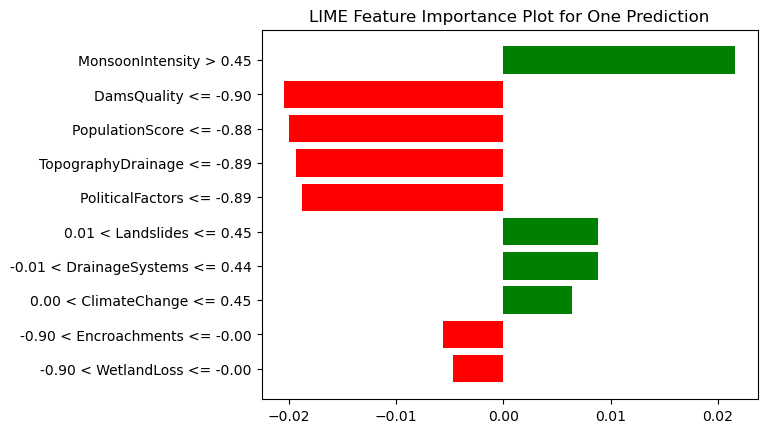

In [9]:
# Additional Plots (Local Surrogate Plot)
# Visualize explanations for a specific prediction
lime_exp.as_pyplot_figure()
plt.title('LIME Feature Importance Plot for One Prediction')
plt.show()


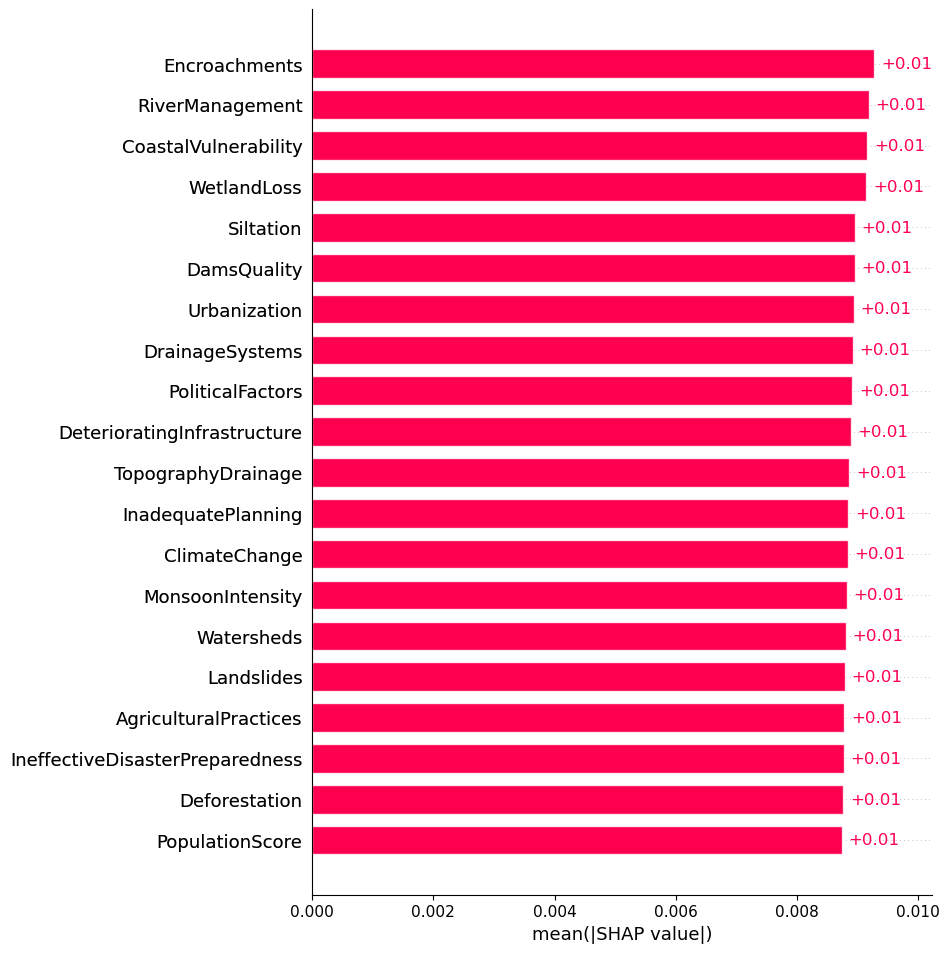

In [11]:
import pandas as pd
import shap
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split

# Load your CSV file (update the file path accordingly)
data_path = 'flood.csv'  # Replace with the correct file path
df = pd.read_csv(data_path)

# Separate features and target variable
X = df.drop('FloodProbability', axis=1)  # Replace 'target_column' with your actual target column name
y = df['FloodProbability']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the BayesianRidge model
model = BayesianRidge().fit(X_train, y_train)

# Compute SHAP values
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

# Plot SHAP feature importance
shap.plots.bar(shap_values, max_display=20)


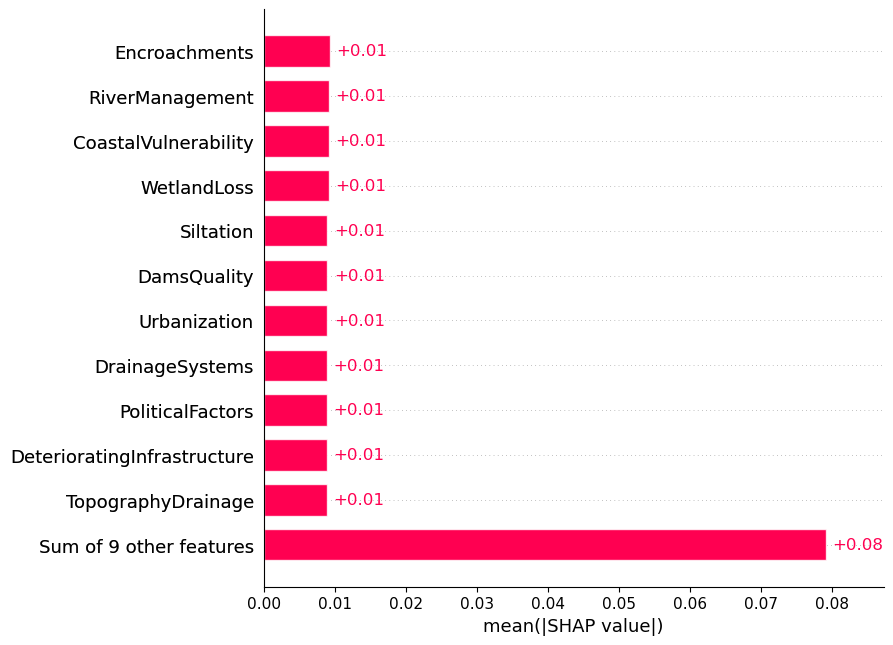

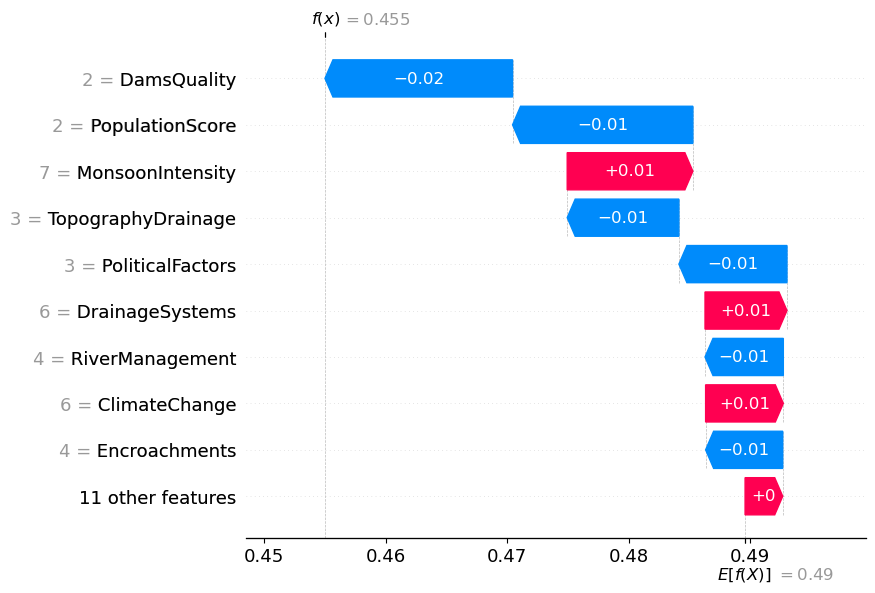

In [12]:
import pandas as pd
import shap
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import train_test_split

# Load your CSV file (update the file path accordingly)
data_path = 'flood.csv'  # Replace with the correct file path
df = pd.read_csv(data_path)

# Separate features and target variable
X = df.drop('FloodProbability', axis=1)  # Replace 'target_column' with your actual target column name
y = df['FloodProbability']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the BayesianRidge model
model = BayesianRidge().fit(X_train, y_train)

# Compute SHAP values
explainer = shap.Explainer(model, X_test)
shap_values = explainer(X_test)

# Plot SHAP bar plot for feature importance
shap.plots.bar(shap_values, max_display=12
              )

# Select a single instance for the waterfall plot (e.g., the first instance in the test set)
instance_index = 0  # You can change this to any instance in X_test

# Plot SHAP waterfall plot for a single prediction
shap.plots.waterfall(shap_values[instance_index])
